<a href="https://colab.research.google.com/github/simonzalan/vitmav45-nagyhazi/blob/main/milestone1-vitmav45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting image datasets from the MVTEC website

In [ ]:

!wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz -O mvtec_anomaly_detection.tar.xz
!tar -xf mvtec_anomaly_detection.tar.xz

--2022-10-23 12:43:13--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5264982680 (4.9G) [application/x-xz]
Saving to: ‘mvtec_anomaly_detection.tar.xz’

mvtec_anomaly_detec 100%[===================>]   4.90G  18.7MB/s    in 4m 32s  

2022-10-23 12:47:46 (18.4 MB/s) - ‘mvtec_anomaly_detection.tar.xz’ saved [5264982680/5264982680]



In [ ]:
!ls /content/
!ls /content/hazelnut/

bottle	 grid	      metal_nut			      sample_data  transistor
cable	 hazelnut     mvtec_anomaly_detection.tar.xz  screw	   wood
capsule  leather      pill			      tile	   zipper
carpet	 license.txt  readme.txt		      toothbrush
ground_truth  license.txt  readme.txt  test  train


Installing library for easy splitting of the downloaded dataset

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating a validation image batch from the training batch

In [ ]:

import splitfolders
splitfolders.ratio("/content/hazelnut/train", output="output1", seed=1337, ratio=(.9,0.1)) 

Copying files: 391 files [00:01, 212.24 files/s]


Checking if the images are in their places

In [ ]:
!ls /content/output1/train/good


000.png  041.png  082.png  124.png  167.png  216.png  257.png  300.png	345.png
001.png  042.png  083.png  125.png  168.png  218.png  259.png  301.png	346.png
002.png  043.png  085.png  127.png  169.png  219.png  260.png  302.png	348.png
003.png  044.png  086.png  128.png  171.png  220.png  261.png  303.png	349.png
004.png  045.png  088.png  129.png  172.png  221.png  262.png  305.png	350.png
005.png  046.png  089.png  130.png  173.png  222.png  263.png  306.png	351.png
006.png  047.png  090.png  131.png  174.png  223.png  264.png  307.png	352.png
007.png  048.png  091.png  132.png  175.png  224.png  265.png  308.png	353.png
008.png  049.png  092.png  133.png  176.png  225.png  266.png  309.png	354.png
010.png  050.png  093.png  134.png  177.png  226.png  267.png  310.png	355.png
011.png  051.png  094.png  135.png  179.png  227.png  268.png  311.png	358.png
012.png  052.png  095.png  136.png  181.png  228.png  269.png  312.png	359.png
013.png  053.png  096.png  137.png  182.png  229.png

Testing if the images are where they need to be

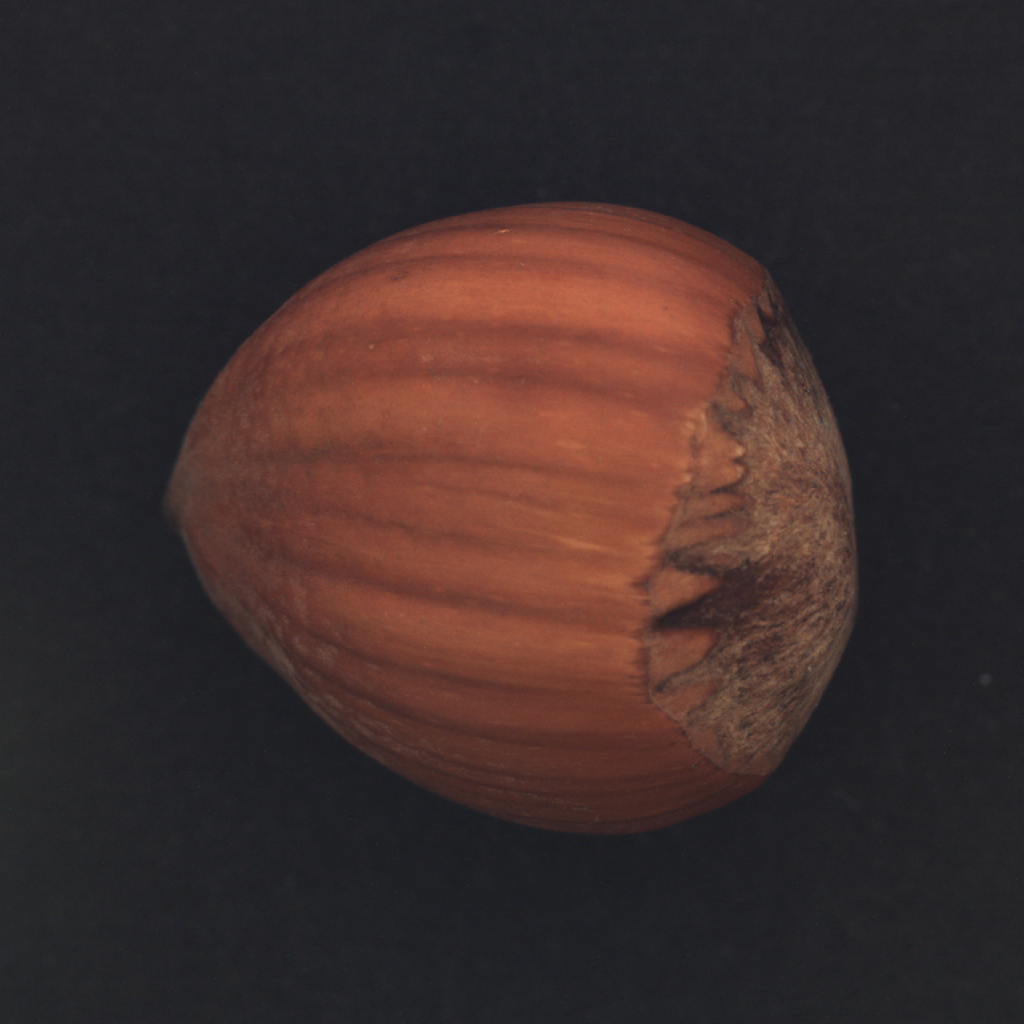

In [ ]:
from IPython.display import Image
Image("/content/output1/val/good/009.png")


Importing libraries that will be used later

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading the images into variables(training, testinf and validation)

In [ ]:
image_size = 256
num_classes = 10
batch_size = 2

train_ds = image_dataset_from_directory("/content/output1/train/", 
                                        label_mode='categorical',
                                        image_size=(image_size, image_size),
                                        batch_size=batch_size)
val_ds = image_dataset_from_directory("/content/output1/val/",
                                      label_mode='categorical',
                                      image_size=(image_size, image_size),
                                      batch_size=batch_size)
test_ds = image_dataset_from_directory("/content/hazelnut/test/",
                                      label_mode='categorical',
                                      image_size=(image_size, image_size),
                                      batch_size=batch_size)



Found 351 files belonging to 1 classes.
Found 40 files belonging to 1 classes.
Found 110 files belonging to 5 classes.


Checking if the images are all the same size

In [ ]:
from PIL import Image
import os.path

files = os.listdir("/content/output1/val/good/")
same_size = True
for f in files:
    filename = "/content/output1/val/good/" + f
    im = Image.open(filename)
    #print(im.size)
    if im.size != (1024, 1024):
        print("NOT OK")
        same_size = False

print(same_size)

True
